# Relatório de Análise VII

## Criando Agrupamentos

In [66]:
import pandas as pd

In [67]:
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,33.33,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


In [68]:
dados['Valor'].mean()

4985.730140445705

In [69]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]


In [70]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
80           Flamengo
Name: Bairro, dtype: object

In [71]:
grupo_bairro = dados.groupby('Bairro')
# função groupby() faz o agrupamento das variáveis passadas como parâmetro
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    6,    16,    18,    23,    32,    34,    37,    44,    45,
                62,
             ...
             22514, 22516, 22519, 22527, 22545, 22546, 22556, 22557, 22558,
             22565],
            dtype='int64', length=3921),
 'Botafogo': Int64Index([   25,    50,    90,    91,   114,   123,   131,   139,   205,
               209,
             ...
             22208, 22224, 22237, 22268, 22397, 22404, 22410, 22459, 22491,
             22535],
            dtype='int64', length=889),
 'Copacabana': Int64Index([    0,    11,    12,    13,    26,    27,    30,    33,    89,
                94,
             ...
             22451, 22457, 22481, 22488, 22525, 22528, 22540, 22554, 22555,
             22560],
            dtype='int64', length=2759),
 'Flamengo': Int64Index([   80,   143,   227,   294,   331,   357,   366,   371,   379,
               403,
             ...
             22299, 22322, 22372, 22394, 22424, 22448, 22473, 22476, 22485,
  

In [72]:
for bairro, data in grupo_bairro:
    #print(bairro)
    #print(dados)
    print('{} -> {}' .format(bairro, data.Valor.mean()))  
# laço for recolhendo todas as variaveis que estao contidas em grupo_bairro e todos os dados relacionados a elas 
# retornando a média para cada bairro
# variaveis do laço diferentes dos DataFrames para que nao haja alterações

Barra da Tijuca -> 7073.721754654425
Botafogo -> 8690.962879640045
Copacabana -> 4137.4135556361
Flamengo -> 4148.489626556016
Ipanema -> 9375.905
Leblon -> 8757.75411119812
Tijuca -> 2042.1940700808625


In [73]:
grupo_bairro['Valor', 'Condominio'].mean().round(2)
# Forma mais simples de realizar o calculo demostrado na célula acima 

,Valor,Condominio
Bairro,,
Barra da Tijuca,7073.72,3537.89
Botafogo,8690.96,958.71
Copacabana,4137.41,1100.80
Flamengo,4148.49,1088.43
Ipanema,9375.91,2199.55
Leblon,8757.75,2075.83
Tijuca,2042.19,703.38


## Estatísticas Descritivas

In [74]:
grupo_bairro['Valor'].describe().round(2)
# função describe() gera um DataFrame com um conjunto de estatísticas descritivas

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [75]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma' })
# agrega um conjunto de funções em um DataFrame

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,100.0,600000.0,27736063.0
Botafogo,700.0,4500000.0,7726266.0
Copacabana,100.0,35000.0,11415124.0
Flamengo,800.0,35000.0,2999358.0
Ipanema,1200.0,90000.0,16876629.0
Leblon,100.0,100000.0,11183652.0
Tijuca,750.0,45000.0,2272962.0


In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

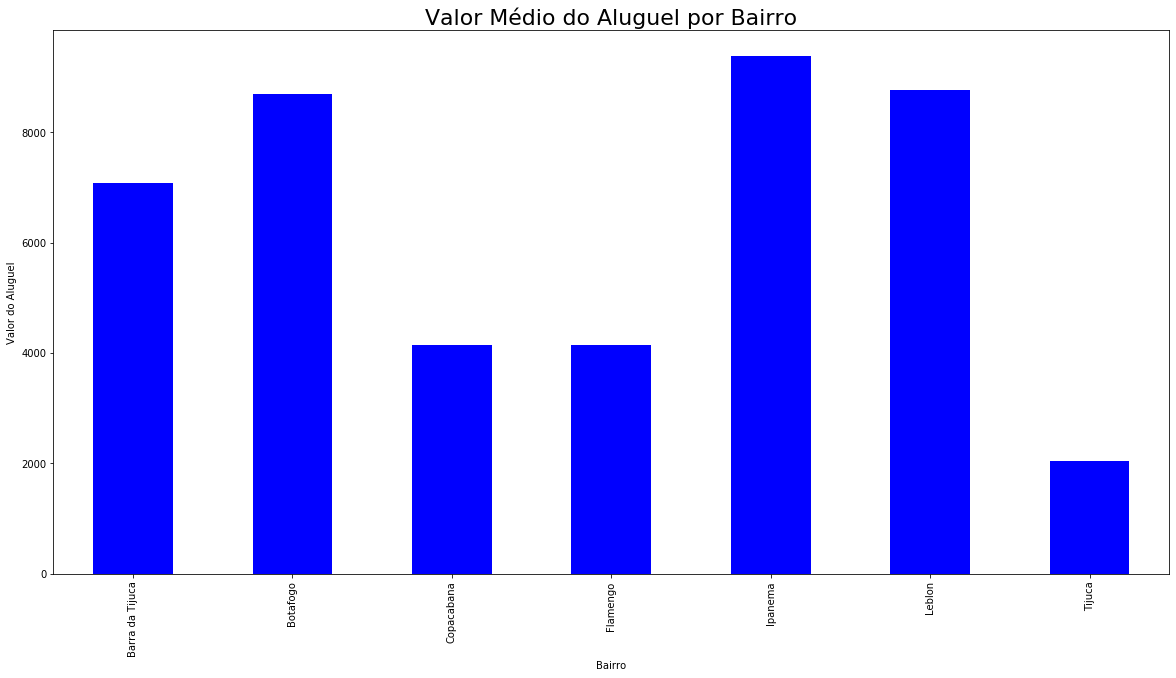

In [77]:
#grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

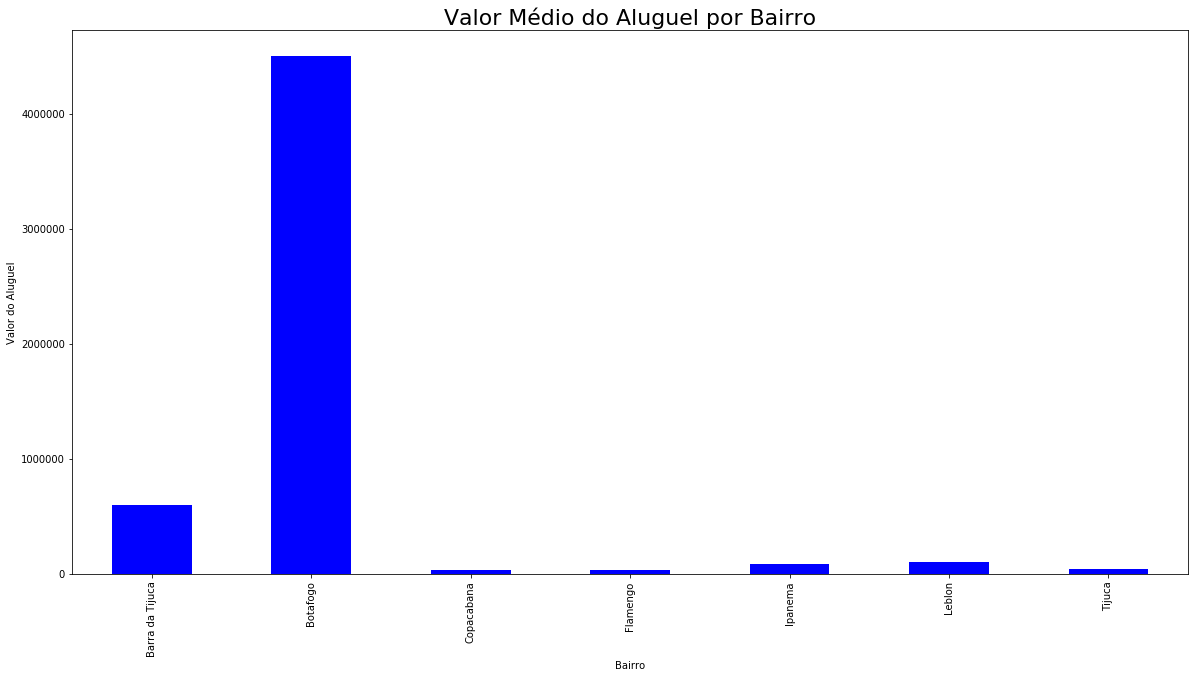

In [78]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})